# **Mitosis Classifier**
---

<font size = 4>This notebook presents a deep learning pipeline to classify short videos following a cell as it undergoes a mitosis. The algorithm classifies the whole video, telling whether it show a normal or an abnormal mitosis

---
<font size = 4>*Disclaimer*:

<font size = 4>This notebook is part of the Zero-Cost Deep-Learning to Enhance Microscopy project (https://github.com/HenriquesLab/DeepLearning_Collab/wiki). Jointly developed by the Jacquemet (link to https://cellmig.org/) and Henriques (https://henriqueslab.github.io/) laboratories.

<font size = 4>This notebook's arcitectures are largely based on the papers: 



<font size = 4>**Very Deep Convolutional Networks for Large-Scale Image Recognition** by Karen Simonyan *et al.* published on arXiv in 2014
(https://arxiv.org/abs/1409.1556)

<font size = 4>**Deep Residual Learning for Image Recognition** by Kaiming He *et al.* published on arXiv in 2015
(https://arxiv.org/abs/1512.03385)

<font size = 4>**Xception: Deep learning with depthwise separable convolutions** by François Chollet,  published on arXiv in 2017 (https://arxiv.org/abs/1610.02357)

<font size = 4>**HEp-2 Cell Image Classification With Deep Convolutional Neural Networks** by Zhimin Gao *et al.*  published on the IEEE Journal of Biomedical and Health Informatics in 2017 (https://ieeexplore.ieee.org/document/7400923)




---
###**Structure of a notebook**

<font size = 4>The notebook contains two types of cell:  

<font size = 4>**Text cells** provide information and can be modified by douple-clicking the cell. You are currently reading the text cell. You can create a new text by clicking `+ Text`.

<font size = 4>**Code cells** contain code and the code can be modfied by selecting the cell. To execute the cell, move your cursor on the `[ ]`-mark on the left side of the cell (play button appears). Click to execute the cell. After execution is done the animation of play button stops. You can create a new coding cell by clicking `+ Code`.

---
###**Table of contents, Code snippets** and **Files**

<font size = 4>On the top left side of the notebook you find three tabs which contain from top to bottom:

<font size = 4>*Table of contents* = contains structure of the notebook. Click the content to move quickly between sections.

<font size = 4>*Code snippets* = contain examples how to code certain tasks. You can ignore this when using this notebook.

<font size = 4>*Files* = contain all available files. After mounting your google drive (see section 1.) you will find your files and folders here. 

<font size = 4>**Remember that all uploaded files are purged after changing the runtime.** All files saved in Google Drive will remain. You do not need to use the Mount Drive-button; your Google Drive is connected in section 1.2.

<font size = 4>**Note:** The "sample data" in "Files" contains default files. Do not upload anything in here!

---
###**Making changes to the notebook**

<font size = 4>**You can make a copy** of the notebook and save it to your Google Drive. To do this click file -> save a copy in drive.

<font size = 4>To **edit a cell**, double click on the text. This will show you either the source code (in code cells) or the source text (in text cells).
You can use the `#`-mark in code cells to comment out parts of the code. This allows you to keep the original code piece in the cell as a comment.

# **0. Before getting started**
---

<font size = 4>Before you run the notebook, please ensure that you are logged into your Google account and have the training and/or data to process in your Google Drive.

<font size = 4>For the mitosis classifier to train, **it needs to have access to a training dataset composed by mitosis videos, distributed in "Normal" and "Abnormal" folders**. 

<font size = 4>**We strongly recommend that you generate extra mitosis videos. These videos can be used to assess the quality of your trained model (test dataset)**. The quality control assessment can be done directly in this notebook.

<font size = 4>Here's a common file structure that can work:
*   Experiment A
    - **training**
      - NormalMitosis
        - video_1.tif, video_2.tif, ...
      - AbnormalMitosis
        - video_80.tif, video_102.tif, ...
    - **test**
      - NormalMitosis
        - img_300.tif, img_320.tif
      - AbnormalMitosis
        - img_315.tif, img_360.tif
    
    - **Results**

---
<font size = 4>**Important note**

<font size = 4>- If you wish to **Train a network from scratch** using your own dataset, you will need to run **sections 1 - 4**, then use **section 5** to assess the quality of your model and **section 6** to run predictions using the model that you trained.

<font size = 4>- If you wish to **Evaluate your model** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 5** to assess the quality of your model.

<font size = 4>- If you only wish to **run predictions** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 6** to run the predictions on the desired model.
---

# **1. Install The classifier dependencies**
---

<font size = 4>In this section you will first install the required extra libraries for the model to work and then load the necessary dependencies. These two steps are needed for training, test and inference.


## **1.1. Install key dependencies**
---
<font size = 4> 


In [1]:
#@markdown ##Play to install dependencies


!pip install keras-video-generators
!pip install -U keras-tuner
!pip install elasticdeform
!pip install keras --upgrade
!git clone --branch patch-1  https://github.com/pdelgado248/keras-video-generators.git

!pip install keras==2.6.*

  Created wheel for keras-video-generators: filename=keras_video_generators-1.0.14-py3-none-any.whl size=12881 sha256=ac2fde53617d536861bea7cd37124a30dde6ddf9b10a69ff52cb24277affb7b3
  Stored in directory: /root/.cache/pip/wheels/bc/22/94/eda4e8caf00c0ffd3030fecbf2e0334b8a7f038f4451e20b00
Successfully built keras-video-generators
     |████████████████████████████████| 133 kB 9.2 MB/s 
     |████████████████████████████████| 93 kB 2.2 MB/s 
     |████████████████████████████████| 1.6 MB 7.3 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0+zzzcolab20220506162203 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0+zzzcolab20220506162203 requires keras<2.9,

## **1.2. Load key dependencies**
---
<font size = 4> 

In [5]:
#@markdown ##Play to load dependencies



import numpy as np
import os
import sys
sys.path.insert(0, '/content/keras-video-generators/src')

import glob
import tensorflow.keras as keras
import tensorflow as tf

from tensorflow.keras import initializers, layers, models, optimizers, metrics, regularizers
from tensorflow.keras import backend as K 

from tensorflow.keras.layers import Activation, Flatten, Dense, Reshape, Conv2D, BatchNormalization, MaxPooling2D, \
GlobalMaxPooling2D, GlobalAveragePooling2D, AveragePooling2D, TimeDistributed, GRU, Dense, Dropout, LSTM, ConvLSTM2D


from keras_video import VideoFrameGenerator
from kerastuner.tuners import RandomSearch, Hyperband
import IPython

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import time

import tifffile as tif
from PIL import Image

import matplotlib.pyplot as plt

# **2. Mount your Google Drive**
---

<font size = 4>To use this notebook on the data present in your Google Drive, you need to mount your Google Drive to this notebook.

<font size = 4>Play the cell below to mount your Google Drive and follow the link. In the new browser window, select your drive and select 'Allow', copy the code, paste into the cell and press enter. This will give Colab access to the data on the drive.

<font size = 4>Once this is done, your data are available in the Files tab on the top left of notebook.

<font size = 5>**If you cannot see your files, reactivate your session by connecting to your hosted runtime.**


<font size = 4>Connect to a hosted runtime.

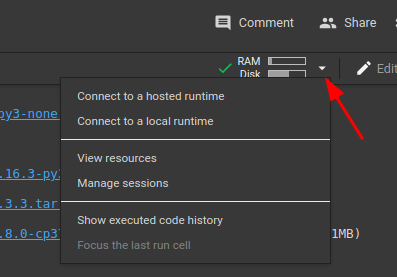

In [ ]:
#@markdown Run this cell to mount your user's Google Drive to Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')

# **3. Select your parameters and paths**
---

<font size = 4>In this section the training parameters are selected. The code is designed to perform a series of "equal" trainings, that is, with the same hyperparameters, to obtain statistical measures such as a mean precision of all the trainings.

<font size = 4>The parameter **`iterations`** controls this. If **`iterations = 1`** a **single** training will be performed.

<font size = 4>Select your paths and hyperparameters in the cell below and run it to fix these variables.

##**Setting main training parameters**
---
<font size = 4> 

In [4]:
#Input parameters


#@markdown ###Paths and architectures:
#Folder of the whole project
#mainFolder = '/content/drive/MyDrive/Nantes-Madrid/MITOSIS CLASSIFICATION/Publications/Publications code/' #@param {type:"string"}

#@markdown Folder with the training data
trainPath = '/content/drive/MyDrive/Pablo Delgado/Nantes-Madrid/New_subtracks/Final_images/mitosis_12_train'  #@param {type:"string"}

#@markdown Name of the architecture that will be used as the network backbone
modelName = "VGG16" #@param ['VGG16','ResNet50','Xception','Gao']{type:"string"}

#@markdown Path to store the weights obtained during training 
trained_weights_path = '/content' #@param {type:"string"}



#@markdown #---------------------------------------------------------------------------------------------------------------------------------------

#@markdown #Hyperparameters:

#@markdown #---------------------------------------------------------------------------------------------------------------------------------------
#@markdown ##Training iterations
#@markdown Number of training iterations: a series of iterations will be conducted with the same hyperparameters. 
#@markdown This will allow to obtain statistical results over several sample trainings. The result will be several sets of weights
#@markdown trained in the same way.
#@markdown For a single training, set **`iterations = 1`**.
#Default: 1
iterations = 1 #@param {type:"integer"}

#@markdown Iteration to start with in case the training was interrupted, otherwise **`init_iter = 0`**
init_iter = 0 #@param {type:"integer"}

#@markdown #---------------------------------------------------------------------------------------------------------------------------------------

#@markdown Percentage of images used for validation from the train folder
#Default:0.43
VALIDATION_SPLIT = 0.43 #@param {type:"number"}

#@markdown Batch size
#Default: 20
bs = 20 #@param {type:"integer"}

#@markdown Number of epochs
#Default: 500
EPOCHS = 1 #@param {type:"integer"}

#@markdown Patience: How many epochs without improving performance should the model wait before stopping the training
#Default: 100
PATIENCE = 100 #@param {type:"integer"}

#@markdown #---------------------------------------------------------------------------------------------------------------------------------------
#@markdown #Two steps training
#@markdown If you check the box and you are using one of ther pretrainable architectures (
#@markdown VGG16, ResNet50, Xception), you will need to execute the whole training 2 times: first with **`step = 1`** and then 
#@markdown with **`step = 2`**. If you do **not** check it, **`step`** will not be used.
#Default: True 
twoStepsTraining = False #@param {type:"boolean"}
pretrained = twoStepsTraining

#@markdown Step: **`step = 1`** means the model weights are loaded from a pretrained version first.
#@markdown After this, only the 7 last layers of the model become trainable; **`step = 2`** means the
#@markdown model is initialized with the best weightgs of **`step = 1`** training all the algorithm layers are trainable.
#@markdown If you have checked **`twoStepsTraining`**, run first a training with **`step = 1`** and, after you have completed that training, run another training modifying only this parameter to
#@markdown **`step = 2`** and the learning rate to **`lr = lr_step1*0.01`**
step = 1 #@param [1,2]{type:"raw"}


#@markdown #---------------------------------------------------------------------------------------------------------------------------------------

#@markdown #Learning rate 
#@markdown If you have checked **`twoStepsTraining`**, use a learning rate of your choice for **`step = 1`**. Then, for **`step = 2`**, set the learning rate to **`lr = lr_step1*0.01`**.
#@markdown If you have **NOT** checked  **`twoStepsTraining`**, use a learning rate of your choice.
#Default: 0.001
lr = 0.001 #@param {type:"number"}

#Learning rate from step 1: Only use for pretrained = True, step = 2. In this case, it will be manually set to  
#step1Lr = 0.0001 #@param {type:"number"}
step1Lr = 100*lr



#-------------------------------------------------------------------------------------------

CLASSES = 2                 # Number of classes
SIZE = (78, 78)             # Image input size
CHANNELS = 3                # Number of channels: 3 RGB, 1 Grayscale
NBFRAME = 12                # Number of video frames  
SHAPE = SIZE + (CHANNELS,)  # Shape = size + channel (78, 78, 3)
INSHAPE = (NBFRAME,) + SHAPE  # Video-shape = frame + shape (12, 78, 78, 3)



#Prepare a series of random seeds for each of the iteration epochs (extra seeds, just in case, up to 30). In this case, only the first one will be used (preparedValSeeds[0]).
preparedValSeeds = np.array([733, 699,  677,  776, 1261,  739,  665,   41, 1579, 1872,
                             298, 1244,  225,  381,  1793,  517, 1293, 1797, 1281, 91,
                             311, 1994, 1508,  499,   89,  760, 1445, 1756,  1862, 751])


#Create folders to store the weights. A folder with 2 subfolders (step1, step2) in case you use a pretrained model. A single folder in case you train from scratch
if pretrained is True:
  if step == 1:
    folder2steps = trained_weights_path + '/'+str(modelName)+'-best_weights_patience'+str(PATIENCE)+'-lr'+str(lr)+'-bs'+str(bs)+'-pretrained'
  elif step == 2:
    folder2steps =  trained_weights_path + '/'+str(modelName)+'-best_weights_patience'+str(PATIENCE)+'-lr'+str(step1Lr)+'-bs'+str(bs)+'-pretrained'
else:
  folder2steps =  trained_weights_path + '/'+str(modelName)+'-best_weights_patience'+str(PATIENCE)+'-lr'+str(lr)+'-bs'+str(bs)+'-from_scratch'

if not os.path.exists(folder2steps):
  os.makedirs(folder2steps)

if pretrained is True:
  folderCurrStep = folder2steps+'/best_weights-step'+str(step)
else:
  folderCurrStep = folder2steps

if not os.path.exists(folderCurrStep):
  os.makedirs(folderCurrStep)



#*************************************************************************************************************************************
#-------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------
#Models


#VGG16
if modelName == 'VGG16':


  def build_convnet(step):

      #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
      if pretrained is True:
        model = tf.keras.applications.VGG16(
        include_top=False,
        input_shape=SHAPE,
        weights='imagenet'  # ImageNet weights
        )
        # Keep only the last 7 layers to train 
        model.trainable = False
      
        trainable = 7
        for layer in model.layers[:-trainable]:
            layer.trainable = False
        for layer in model.layers[-trainable:]:
            if not isinstance(layer, layers.BatchNormalization): 
                layer.trainable = True
      #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~        
      else:
        model = tf.keras.applications.VGG16(
        include_top=False,
        input_shape=SHAPE
        )

      output = Flatten()

      return tf.keras.models.Sequential([model, output])


  def action_model(shape=(12, 78, 78, 3), nbout=2,step=step):
      # Here we call our conv network
      convnet = build_convnet(step)
      
      # Final model
      model = keras.Sequential()
      # Call convnet into the TimeDistributed layer with video shape
      model.add(TimeDistributed(convnet, input_shape=shape))
      # LSTM for temporal features extraction
      model.add(LSTM(64))
      # Classification part
      model.add(Dropout(.4))
      model.add(Dense(150, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
      model.add(Dropout(.2))
      model.add(Dense(nbout, activation='softmax'))

      return model

#-------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------

elif modelName == 'Xception':


  def build_convnet(step):
      #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
      if pretrained is True:
        model = tf.keras.applications.Xception(
            include_top=False,
            input_shape=SHAPE,
            weights='imagenet'  # ImageNet weights
        )
        # Keep only the last 7 layers to train 
        model.trainable = False
        trainable = 7
        for layer in model.layers[:-trainable]:
            layer.trainable = False
        for layer in model.layers[-trainable:]:
            if not isinstance(layer, layers.BatchNormalization): 
                layer.trainable = True
      #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

      else:
        model = tf.keras.applications.Xception(
            include_top=False,
            input_shape=SHAPE  
        )

      output = Flatten()

      return tf.keras.models.Sequential([model, output])

  def action_model(shape=(12, 78, 78, 3), nbout=2,step=step):
      # Here we call our conv network
      convnet = build_convnet(step)
      
      # Final model
      model = keras.Sequential()
      # Call convnet into the TimeDistributed layer with video shape
      model.add(TimeDistributed(convnet, input_shape=shape))
      # LSTM for temporal features extraction
      model.add(LSTM(64))
      # Classification part
      model.add(Dropout(.4))
      model.add(Dense(150, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
      model.add(Dropout(.2))
      model.add(Dense(nbout, activation='softmax'))

      return model

#-------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------

elif modelName == 'ResNet50':

  

  def build_convnet(step):
      #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~      
      if pretrained is True:
        model = tf.keras.applications.ResNet50(
            include_top=False,
            input_shape=SHAPE,
            weights='imagenet' # ImageNet weights
        )
        model.trainable = False
        trainable = 7
        for layer in model.layers[:-trainable]:
            layer.trainable = False
        for layer in model.layers[-trainable:]:
            if not isinstance(layer, layers.BatchNormalization): 
                layer.trainable = True
      #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~      
      else:
        model = tf.keras.applications.ResNet50(
            include_top=False,
            input_shape=SHAPE
        )

      output = Flatten()

      return tf.keras.models.Sequential([model, output])


  def action_model(shape=(12, 78, 78, 3), nbout=2,step=step):
      # Here we call our conv network
      convnet = build_convnet(step)
      
      # Final model
      model = keras.Sequential()
      # Call convnet into the TimeDistributed layer with video shape
      model.add(TimeDistributed(convnet, input_shape = shape))
      # LSTM for temporal features extraction
      model.add(LSTM(64))
      # Classification part
      model.add(Dropout(.4))
      model.add(Dense(150, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
      model.add(Dropout(.2))
      model.add(Dense(nbout, activation='softmax'))

      return model

#-------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------

elif modelName == 'Gao':


  def build_convnet(step):
      momentum = .9 # Batch normalization momemtum (optional)
      model = keras.Sequential() # Starts model
      # Input layer
      model.add(Conv2D(6, (7,7), input_shape=SHAPE, padding='valid', activation='relu'))
      model.add(BatchNormalization(momentum=momentum))
      
      model.add(MaxPooling2D(2,2))
      
      model.add(Conv2D(16, (4,4), padding='valid', activation='relu'))
      model.add(BatchNormalization(momentum=momentum))
      
      model.add(MaxPooling2D(3,3))

      model.add(Conv2D(32, (3,3), padding='valid', activation='relu'))
      model.add(BatchNormalization(momentum=momentum))
      
      model.add(MaxPooling2D(3,3))
      
      # Flatten layer for LSTM input
      model.add(Flatten()) 

      return model



  def action_model(shape=(12, 78, 78, 3), nbout=2,step=step):
      # Here we call our conv network
      convnet = build_convnet(step)
      
      # Final model
      model = keras.Sequential()
      # Call convnet into the TimeDistributed layer with video shape
      model.add(TimeDistributed(convnet, input_shape=shape))
      # LSTM for temporal features extraction
      model.add(LSTM(64))
      # Classification part
      model.add(Dropout(.4))
      model.add(Dense(150, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
      model.add(Dropout(.2))
      model.add(Dense(nbout, activation='softmax'))

      return model


#-------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------
#*************************************************************************************************************************************







#Set checkpoints, learning rate, patience (for training)




# Early stop if validation loss does not improve during 10 epochs
early_stop = EarlyStopping(
    patience=PATIENCE, restore_best_weights=True
)



sys.path.insert(0, '/content/keras-video-generators/src')




#-------------------------------------------------------------------------------------------
# Define global params



# Pattern to get videos and classes
glob_pattern= trainPath + '/{classname}/*'

COUNT_NORMAL = len(os.listdir(trainPath + '/NormalMitosis'))
COUNT_ABNORMAL = len(os.listdir(trainPath + '/AbnormalMitosis'))

print('total normal images :', COUNT_NORMAL )
print('total abnormal images :', COUNT_ABNORMAL )



#Class balancing
initial_bias = np.log([COUNT_NORMAL / COUNT_ABNORMAL])
print("Initial bias: {:.5f}".format(initial_bias[0]))

TRAIN_IMG_COUNT = COUNT_NORMAL + COUNT_ABNORMAL
weight_for_0 = (1 / COUNT_ABNORMAL) * TRAIN_IMG_COUNT / 2.0
weight_for_1 = (1 / COUNT_NORMAL) * TRAIN_IMG_COUNT / 2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print("Weight for class 0: {:.2f}".format(weight_for_0))
print("Weight for class 1: {:.2f}".format(weight_for_1))

#----------------------------------------------------------------------------------------------------------
#Data augmentator

#Data augmentator
data_aug = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    vertical_flip=True,
    horizontal_flip=True,
    rotation_range=90
)










total normal images : 317
total abnormal images : 146
Initial bias: 0.77530
Weight for class 0: 1.59
Weight for class 1: 0.73


# **4. Training**
---

<font size = 4>When you run the next cell, training will start on your train data. After the process, the network will store the weights and results in the specified folder. 

<font size = 4>In your results folder you will find a subfolder for the model you just trained. If you performed a 2-steps training, inside it there will be another set of two subfolders, one for each of the two main training steps. In these subfolders the best weights (best validation score) are saved, as well as the train and validation accuracy for each epoch. Lastly, the values of accuracy, precision, recall and f1 for the best results on validation and also for the results on the test set will be stored in a "Results" document

<font size = 4>This notebook is originally designed to run several iterations of each of the trainings, so it will write a line in the "Results" folder each time an iteration is completed. If you perform several iterations, stop, and resume the process training for extra iterations later, the "Results" folder will not be rewritten, but instead new lines will be added. 

##**Start Training**

Number of all files:  146
class AbnormalMitosis, validation count: 62, train count: 84
Number of all files:  317
class NormalMitosis, validation count: 136, train count: 181
Total data: 2 classes for 265 files for train
Total data: 2 classes for 198 files for validation
58900480/58889256 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:107: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


13/13 [==============================] - 91s 6s/step - loss: 1.5966 - acc: 0.5923 - val_loss: 1.5260 - val_acc: 0.7167


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


total time:  43.91
Number of all files:  146
class AbnormalMitosis, validation count: 62, train count: 84
Number of all files:  317
class NormalMitosis, validation count: 136, train count: 181
Total data: 2 classes for 265 files for train
Total data: 2 classes for 198 files for validation
Total data: 2 classes for 190 files for train
Mean loss:  1.5965992212295532
Mean accuracy:  0.5923076868057251
Mean val_loss:  1.5259768962860107
Mean val_accuracy:  0.7166666388511658

SD loss:  0.0
SD accuracy:  0.0
SD val_loss:  0.0
SD val_accuracy:  0.0


Final model validation scores: 
Number of test images:  198
[0.44697914 0.55302083]   real :  [1. 0.]  index  0
[0.4684899 0.5315101]   real :  [1. 0.]  index  1
[0.4936388 0.5063612]   real :  [1. 0.]  index  2
[0.4607034  0.53929657]   real :  [1. 0.]  index  3
[0.49071252 0.5092875 ]   real :  [1. 0.]  index  4
[0.4495592  0.55044085]   real :  [1. 0.]  index  5
[0.4283355 0.5716646]   real :  [1. 0.]  index  6
[0.44914603 0.55085397]   real 

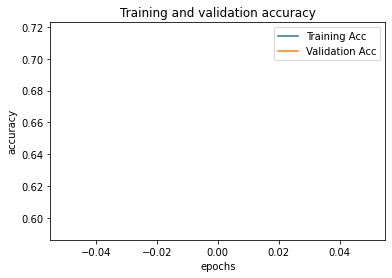

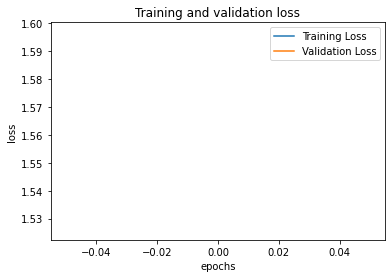

In [5]:
#@markdown ##Play to start Training
#*************************************************************************************************************************************
#Iterative section
for i in range(init_iter,iterations):

  #-------------------------------------------------------------------------------------------
  # Create train and validation generators

  with tf.device("/device:GPU:0"):
    train = VideoFrameGenerator(
        rescale = 1/255.,             # Normalization scale
        glob_pattern = glob_pattern,  # Directory path
        nb_frames = NBFRAME,          # Number of frames
        split_val = VALIDATION_SPLIT,              # Split validation set
        seedVal = preparedValSeeds[0],#Validation seed, from the initial validation seeds list
        split_test = None,            # Split test set
        shuffle = True,               # Randomize file
        batch_size = bs,              # Batch size
        target_shape = SIZE,          # Input size
        nb_channel = CHANNELS,        # Number of channels
        transformation = data_aug,    # Data augmentation
        use_frame_cache=True,        # Use frame chache to store images
        elasticDef = True,          
        elasticDefScale = 5,        
        apply_def = 0.9,
        noiseAdd = True,
        noiseAddScale = 1,
        apply_no = 0.9
    )

    valid = train.get_validation_generator() # Get validation set

  #--------------------------------------------------------------------------------------------

  #Call and compile model

  # Call model
  model = action_model(INSHAPE, CLASSES)

  # Define weights folders name
  if pretrained is True:
    hyperparsName='-lr'+str(lr)+'-bs'+str(bs)+'-pretr-'
  else:
    hyperparsName='-lr'+str(lr)+'-bs'+str(bs)+'-scratch-'

  iterName='iter'+str(i)


  if (pretrained is True) and (step == 2):

    #Load weights from step1
    #Folder for the previous weights (step1) corresponding to the ith iteration
  	
    #prevWeightsPath = glob.glob(folder2steps+'/*1/*'+iterName+'.hdf5' )[0]
    
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    #Use this format to avoid errors
    prevWeightsPath = glob.glob(folder2steps+'/*1/*'+iterName+'.tf*' )[0]

    #Getting only the name up to ".tf"
    prevWeightsPath = prevWeightsPath.split('.tf')[0] + '.tf'
 
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

    
    #prevWeightsPath = glob.glob(folderCurrStep[:-1]+'1/*'+iterName+'.hdf5' )[0]

    print(prevWeightsPath)
    


    #Load the weights from previous model (with all but the last 7 layers of the convolutional 
    #part frozen)
    model.load_weights(prevWeightsPath)

    #Set all the layers of the current model to trainable again
    for layer in model.layers:
      layer.trainable = True


  #Folder for the current step
  #weightsPath = folderCurrStep + '/best_weights' + hyperparsName + iterName + '.hdf5'
  
  #Trying a different weights format to maybe avoid errors
  weightsPath = folderCurrStep + '/best_weights' + hyperparsName + iterName + '.tf'
  

  checkpoint = ModelCheckpoint(filepath = weightsPath, monitor='val_acc', save_best_only=True, save_weights_only=True)

  # Learning rate
  optimizer = keras.optimizers.Adam(lr)
  # Compiler

  with tf.device("/device:GPU:0"):
    model.compile(
        optimizer,
        'categorical_crossentropy',
        metrics=['acc']
    )
  #model.summary()

  #-------------------------------------------------------------------------------------------
  #Train

  # Start time
  start = time.clock()
  # Training
  with tf.device("/device:GPU:0"):
    hist = model.fit(
        train,
        validation_data=valid,
        epochs=EPOCHS,
        verbose=1,
        class_weight = class_weight,
        callbacks=[checkpoint, 
                  early_stop]
    )
  # Finish time and print
  end = time.clock()
  totTime = np.round(end-start,2)
  print('total time: ', totTime)


  #-------------------------------------------------------------------------------------------
  #Evaluate on test data

  #Accuracy = (tp + tn)/(p+n) -- true positive negative
  #Precision = tp / (tp + fp)
  #recall = tp / (tp + fn)
  #f1 = 2tp / (2tp + fp + fn)


  #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  #Maybe necessary again?
  #model = action_model(INSHAPE, CLASSES)
  
  #with tf.device("/device:GPU:0"):
  #  model.compile(
  #      optimizer,
  #      'categorical_crossentropy',
  #      metrics=['acc']
  #  )
  #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 
  #Using the weights in best_weight.hdf5
  model.load_weights(weightsPath)

   
  #Redefine train and val sets with batch_size 1 and no data augmentation for evaluation
  train = VideoFrameGenerator(
    rescale = 1/255.,             # Normalization scale
    glob_pattern = glob_pattern,  # Directory path
    nb_frames = NBFRAME,          # Number of frames
    split_val =  VALIDATION_SPLIT,              # Split validation set
    seedVal = preparedValSeeds[0],#Validation seed, from the initial validation seeds list
    split_test = None,            # Split test set
    shuffle = False,               # Randomize file
    batch_size = 1,              # Batch size
    target_shape = SIZE,          # Input size
    nb_channel = CHANNELS,        # Number of channels
    transformation = None,    # Data augmentation
    use_frame_cache=True,        # Use frame chache to store images
  )

  valid = train.get_validation_generator() # Get validation set

  
  glob_pattern= testPath + '/{classname}/*'


                 

  test = VideoFrameGenerator(
      rescale=1/255.,             # Normalization scale
      glob_pattern=glob_pattern,  # Directory path
      nb_frames=NBFRAME,          # Number of frames
      split_val=None,             # Split validation set
      split_test=None,            # Split test set
      shuffle=False,               # Randomize file
      batch_size=1,               # Batch size
      target_shape=SIZE,          # Input size
      nb_channel=CHANNELS,        # Number of channels
      transformation=None,        # Data augmentation
      use_frame_cache=True        # Use frame chache to store images
  )




  #----------------------------------------------------------------
  #Validation and training measures and graphs



  # Evaluate the model on the test data using `evaluate`
  #print("Evaluate on test data")
  #results = model.evaluate(test, verbose=1, return_dict=True)
  #print(results)
  print('Mean loss: ',np.mean(hist.history['loss']))
  print('Mean accuracy: ', np.mean(hist.history['acc']))
  print('Mean val_loss: ',np.mean(hist.history['val_loss']))
  print('Mean val_accuracy: ',np.mean(hist.history['val_acc']))
  print('')
  print('SD loss: ',np.std(hist.history['loss']))
  print('SD accuracy: ', np.std(hist.history['acc']))
  print('SD val_loss: ',np.std(hist.history['val_loss']))
  print('SD val_accuracy: ',np.std(hist.history['val_acc']))

  import matplotlib.pyplot as plt 
  from google.colab import files
  #-----------------------------------------------------------
  # Retrieve a list of list results on training and test data
  # sets for each training epoch
  #-----------------------------------------------------------
  acc      = hist.history['acc']
  val_acc  = hist.history['val_acc']
  loss     = hist.history['loss']
  val_loss = hist.history['val_loss']



  epochs   = range(len(acc)) # Get number of epochs

  #------------------------------------------------
  # Plot training and validation accuracy per epoch
  #------------------------------------------------
  plt.figure()
  plt.plot  ( epochs, acc, label='Training Acc' )
  plt.plot  ( epochs, val_acc, label='Validation Acc'  )
  plt.title ('Training and validation accuracy')
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend()
  plt.figure()


  #------------------------------------------------
  # Plot training and validation loss per epoch
  #------------------------------------------------
  plt.plot  ( epochs, loss, label='Training Loss')
  plt.plot  ( epochs, val_loss, label='Validation Loss' )
  plt.title ('Training and validation loss')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.legend()


  #Save the train and val accuracy and loss per epoch in a txt
  headersEpochs = 'train_acc,val_acc,train_loss,val_loss'
  scoresEpochs = np.concatenate([np.array(acc)[:,np.newaxis],np.array(val_acc)[:,np.newaxis],np.array(loss)[:,np.newaxis],np.array(val_loss)[:,np.newaxis]],axis=1)

  np.savetxt(folderCurrStep+'/epochScores-iter'+str(i)+'-totTime'+str(totTime)+'.txt',scoresEpochs,header=headersEpochs,delimiter=',',comments='')

  #----------------------------------------------------------------------------
  #Measures based on the analysis of the abnormal class
  


  def calculateMeasures(dataload):
    
    #Calculates accuracy, precision, recall and f1 on the dataload data, returns
    #a numpy array ([acc, pre, rec, f1])


    numFiles=len(dataload.files)

    fp = 0
    tn = 0
    tp = 0
    fn = 0
    index = [];
    print('Number of test images: ', numFiles)
    for i in range(numFiles):	
      video = dataload[i][0]
      groundTruth = dataload[i][1]

      prediction = model.predict(video)
      
      if(groundTruth[0][0] != 0 and prediction[0][0] < 0.5):
        print(prediction[0], "  real : ", groundTruth[0], " index ", i)
        index = index + [i];
        fn = fn + 1
      elif (groundTruth[0][0] != 0 and prediction[0][0] > 0.5):
        tp = tp + 1
      elif (groundTruth[0][0] != 1 and prediction[0][0] > 0.5):
        print(prediction[0], "  real : ", groundTruth[0], " index ", i)
        index = index + [i]
        fp = fp + 1
      elif (groundTruth[0][0] != 1 and prediction[0][0] < 0.5):
        tn = tn + 1
    

    #Obtain accuracy (acc), precision (pre), recall (rec), f1 on test data
    acc = (tp+tn)/numFiles

    print('acc : ', acc)
    
    if (tp+fp)!=0:
      prec = tp/(tp+fp)
      print('prec : ', prec)

    else:
      prec = 0
      print('prec : NaN (tp + fp = 0)')

    if (tp+fn)!=0:  
      rec = tp/(tp+fn)
      print('rec : ', rec)
    else:
      rec = 0
      print('rec : NaN (tp + fn = 0)')

    
    if (2*tp+fp+fn)!=0:
      f1 = 2*tp/(2*tp+fp+fn)
      print('f1 : ', 2*tp/(2*tp+fp+fn))
    else:
      f1 = 0
      print('f1 : NaN (2*tp+fp+fn = 0)')

    scores = str(acc)+','+str(prec)+','+str(rec)+','+str(f1)

    return scores 

  print('\n\nFinal model validation scores: ')
  valScores = calculateMeasures(valid)

  print('\n\nFinal model test scores:')
  testScores = calculateMeasures(test)

  headers = ['iter,val_acc,val_prec,val_rec,val_f1,test_acc,test_prec,test_rec,test_f1']

  #Check whether the results txt file exists. If it doesn't, create it.
  if not os.path.exists(folder2steps+'/results-step'+str(step)+'.txt'):
    np.savetxt(folder2steps+'/results-step'+str(step)+'.txt',headers,delimiter=',',fmt="%s")


  #Append a line of results to the results file
  with open(folder2steps+'/results-step'+str(step)+'.txt', 'a') as file_object:
    file_object.write(str(i)+','+ valScores + ',' + testScores)  
    file_object.write('\n')

# **5. Test**
---

<font size = 4>This section will allow you to obtain performance measurements from the algorithm you have just trained.

<font size = 4>You need to specify a test folder containing images manually distributed between a NormalMitosis subfolder and an AbnormalMitosis subfolder, and that have not been previously used for training. 

<font size = 4>You will provide a path to a previously trained model's folder. The model will be loaded with these weights and applied to the images, obtaining a series of predictions that will then be compared with the ground truth (the subfolder they have been manually assigned). 

<font size = 4>Values of true positives, true negatives, false positives and false negatives will be calculated and used to obtain the accuracy, precision, recall and f1-score of the algorithm.

##**Compute test scores for a previously trained network**

modelName: ResNet50
patience:  100
lr:  0.001
bs:  10
pretrained:  True
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0+zzzcolab20220506162203 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0+zzzcolab20220506162203 requires keras<2.9,>=2.8.0rc0, but you have keras 2.9.0 which is incompatible.


fatal: destination path 'keras-video-generators' already exists and is not an empty directory.
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0+zzzcolab20220506162203 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0+zzzcolab20220506162203 requires keras<2.9,>=2.8.0rc0, but you have keras 2.6.0 which is incompatible.


Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_22 (TimeDis (None, 12, 18432)         23587712  
_________________________________________________________________
lstm_22 (LSTM)               (None, 64)                4735232   
_________________________________________________________________
dropout_44 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 150)               9750      
_________________________________________________________________
dropout_45 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 2)                 302       
Total params: 28,332,996
Trainable params: 28,279,876
Non-trainable params: 53,120
____________________________________

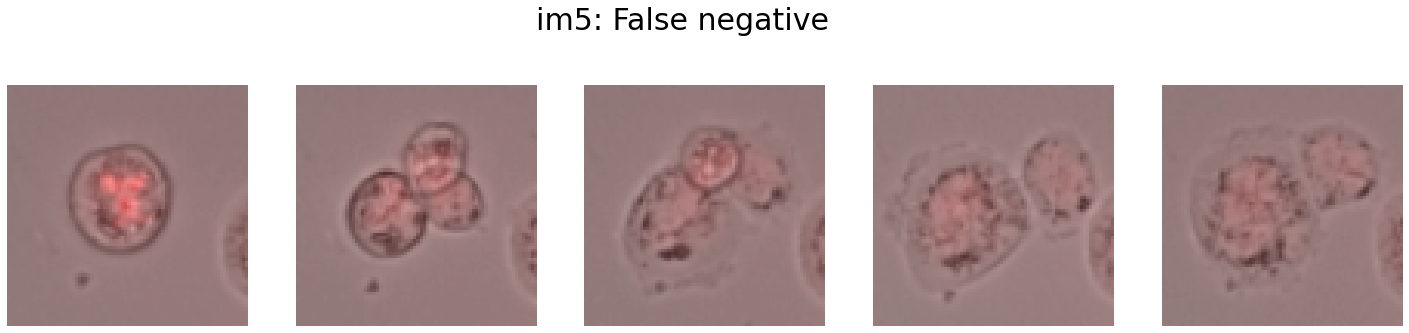

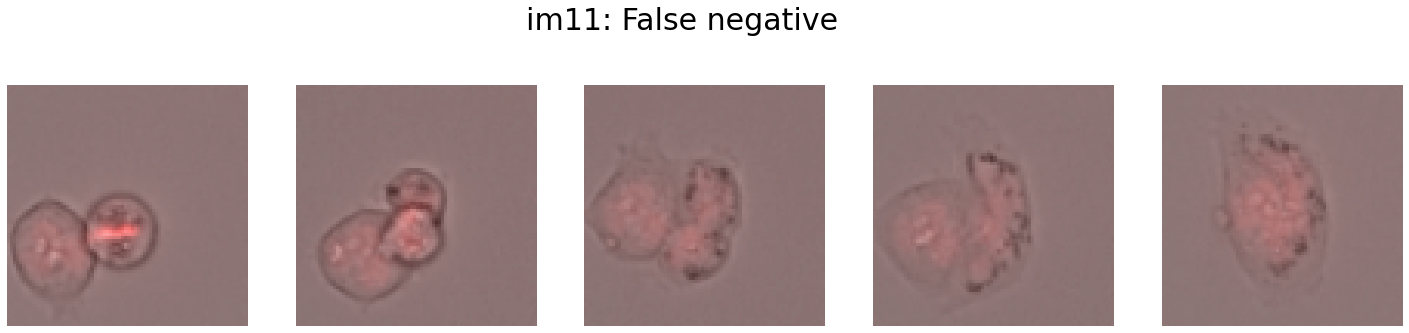

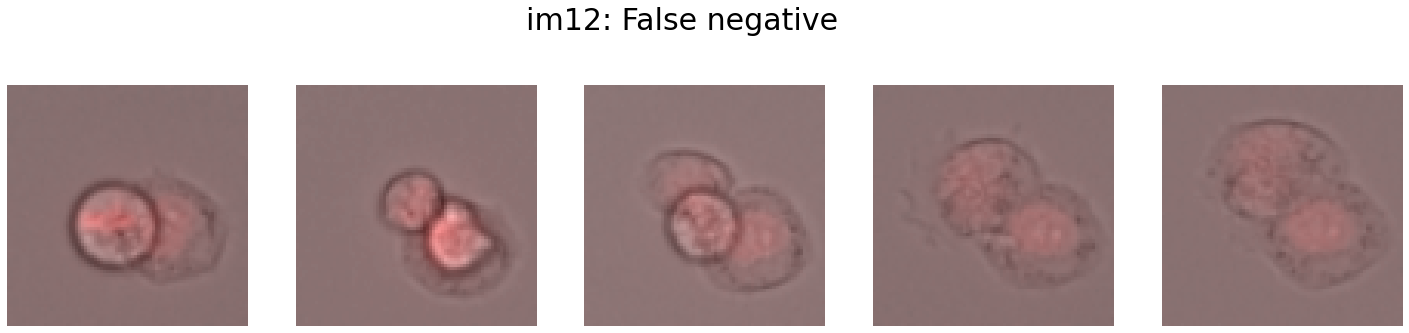

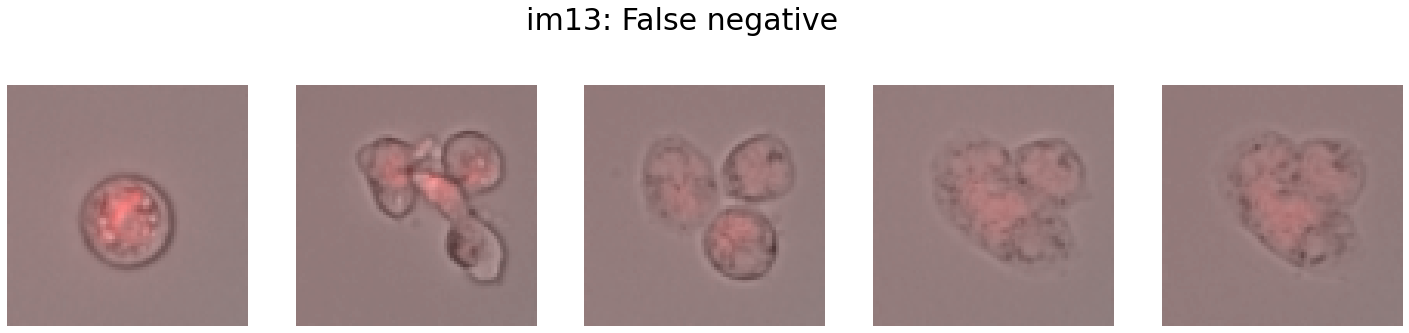

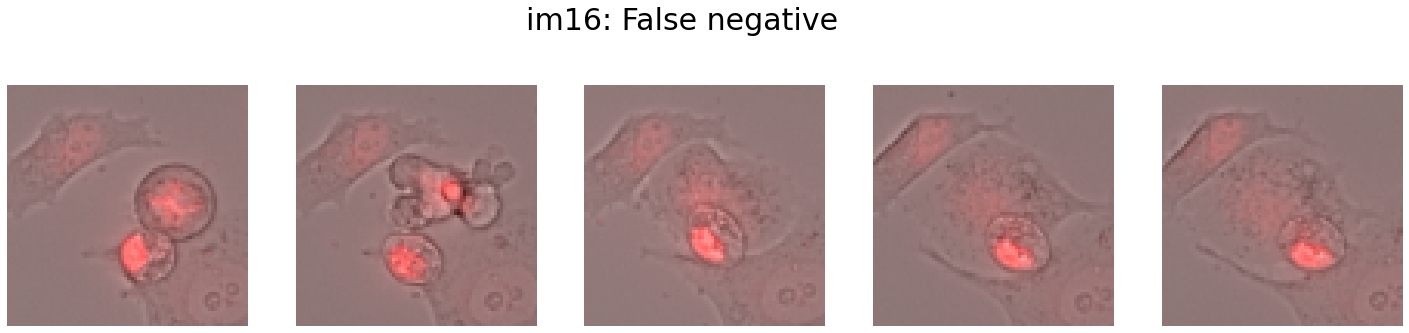

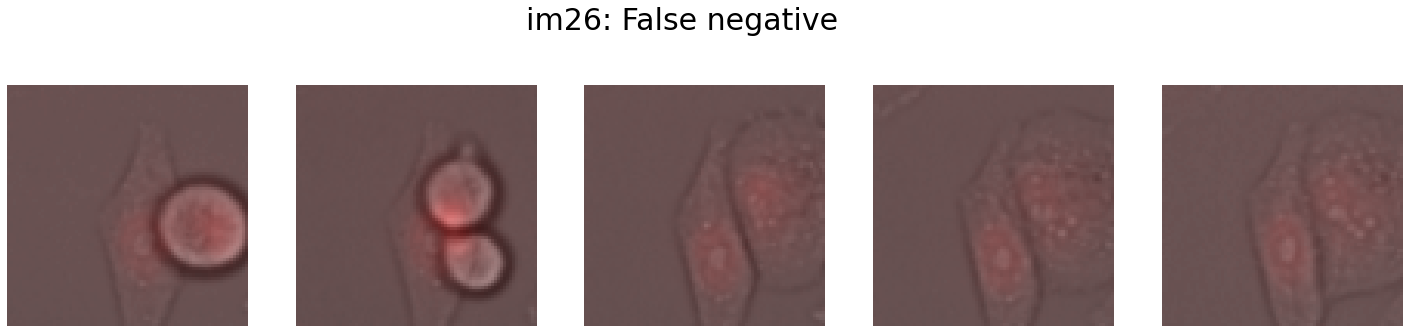

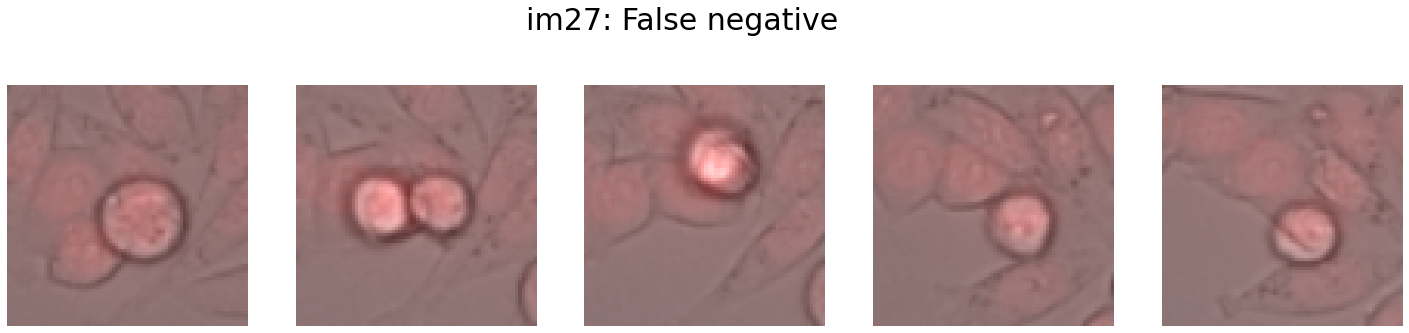

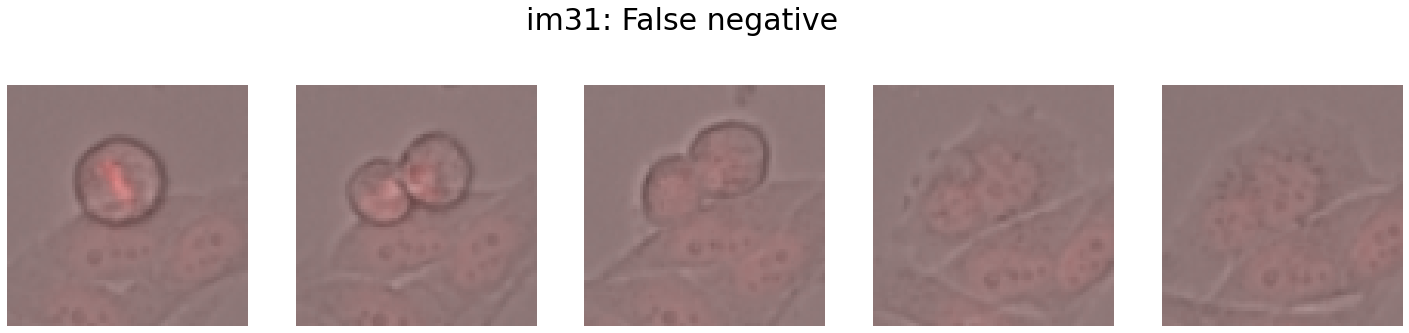

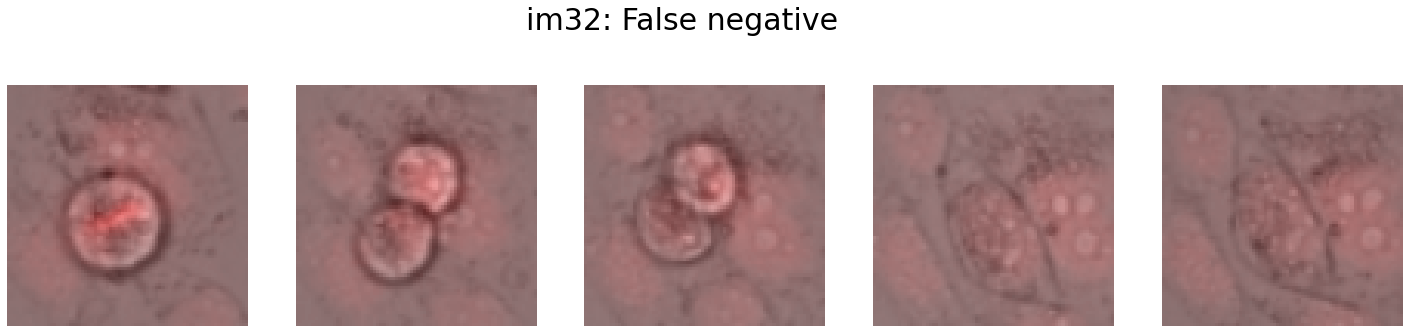

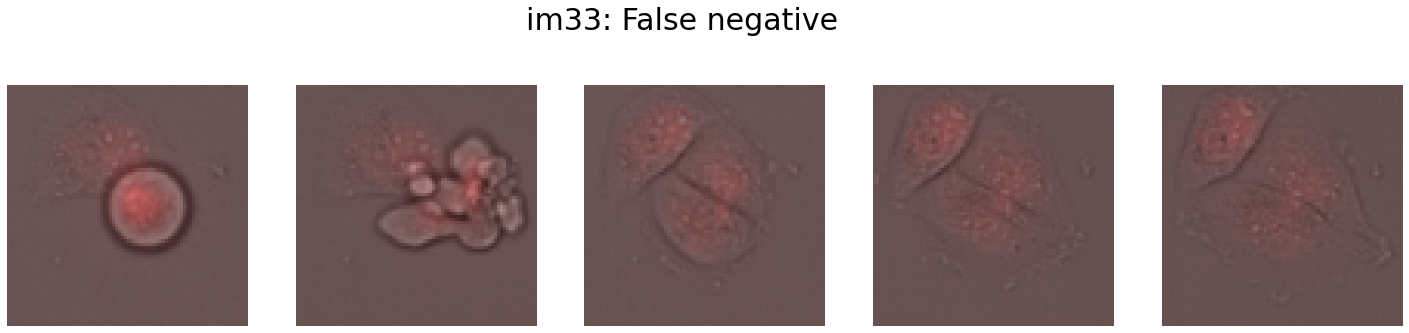

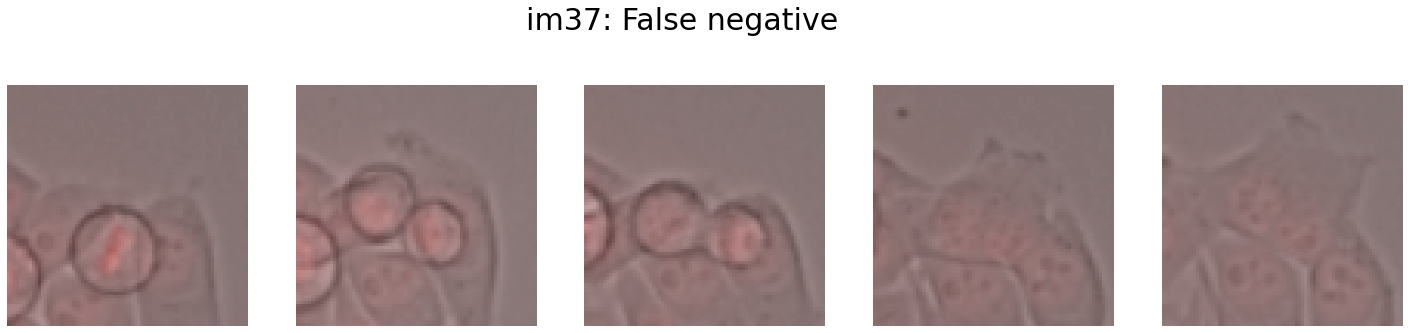

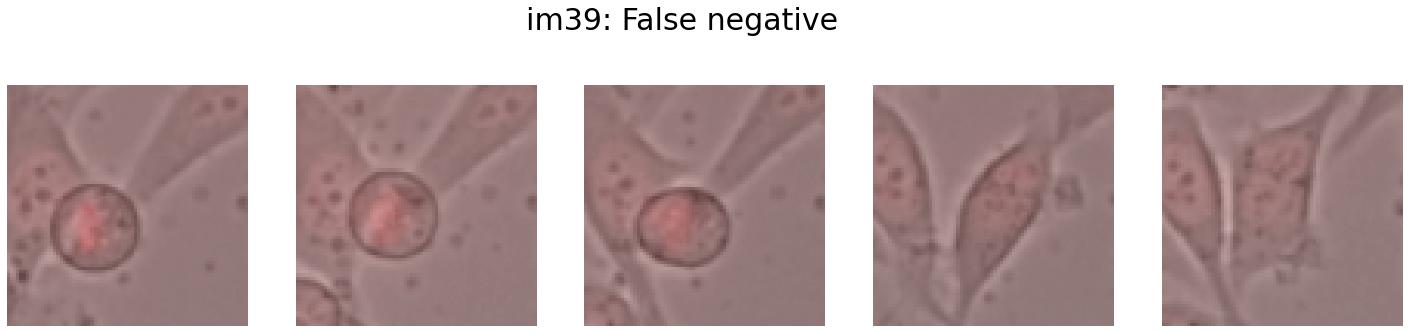

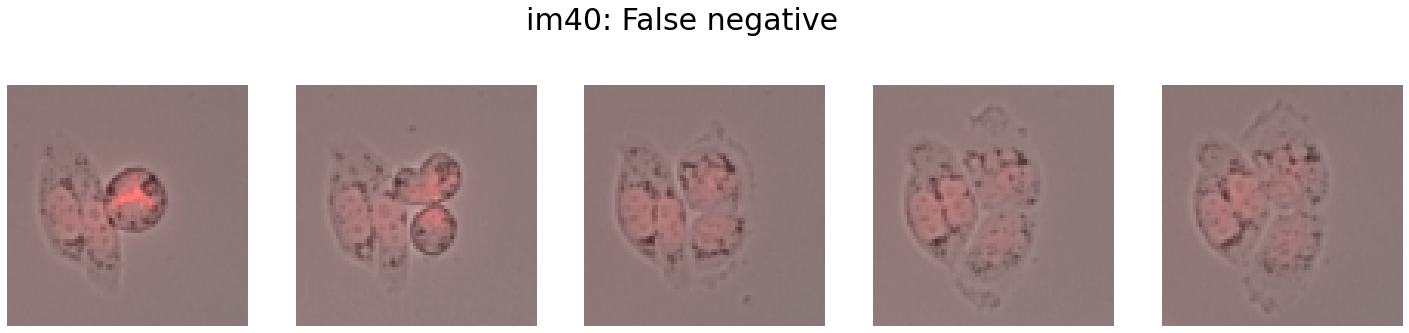

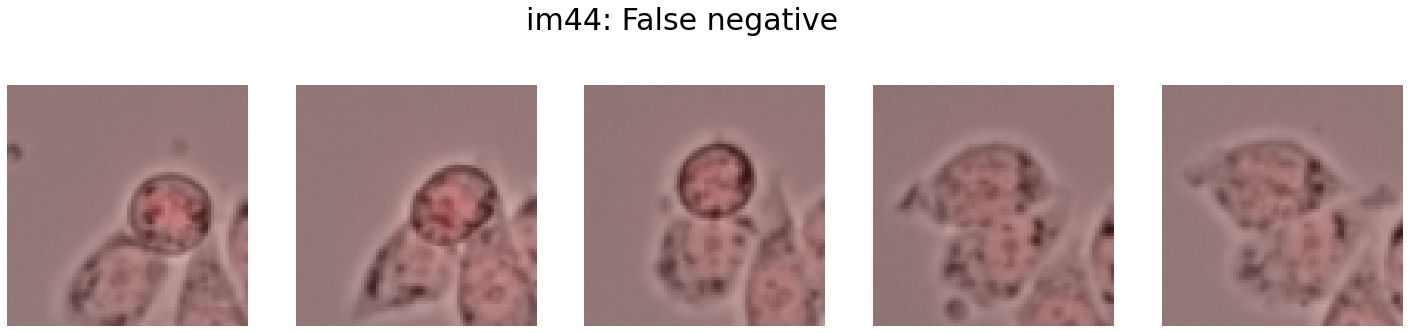

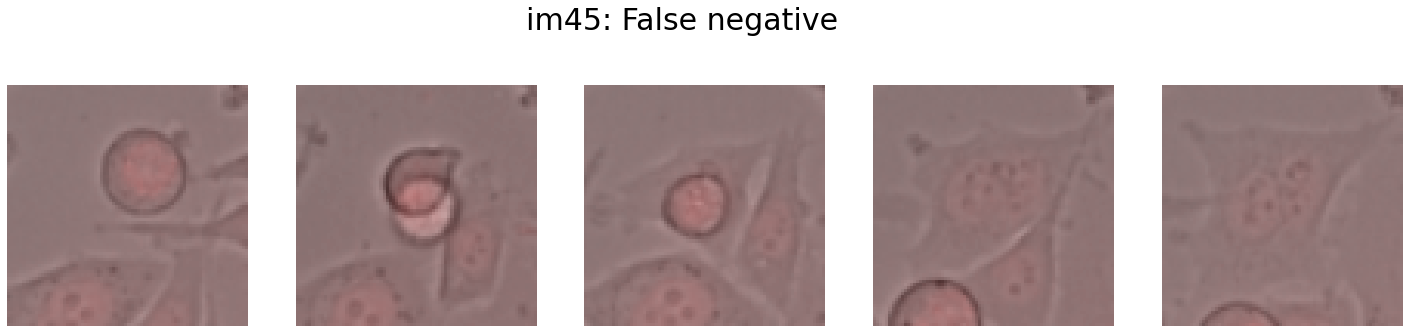

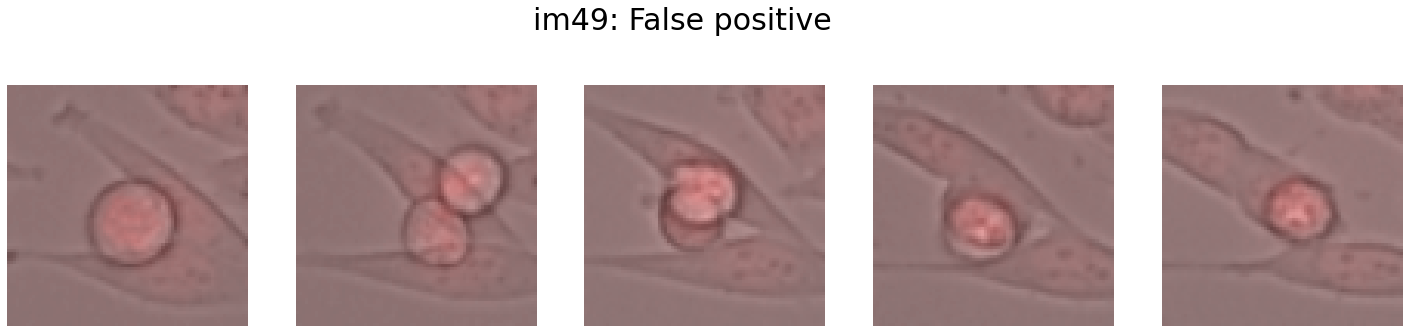

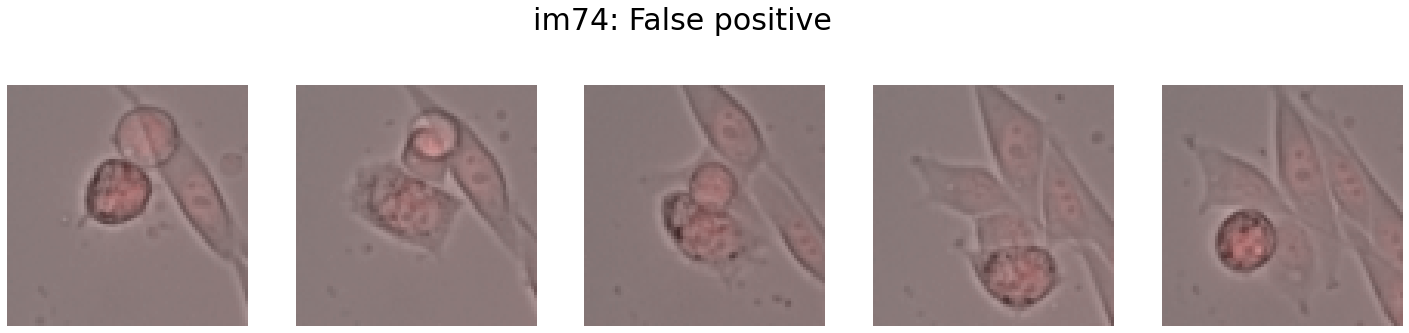

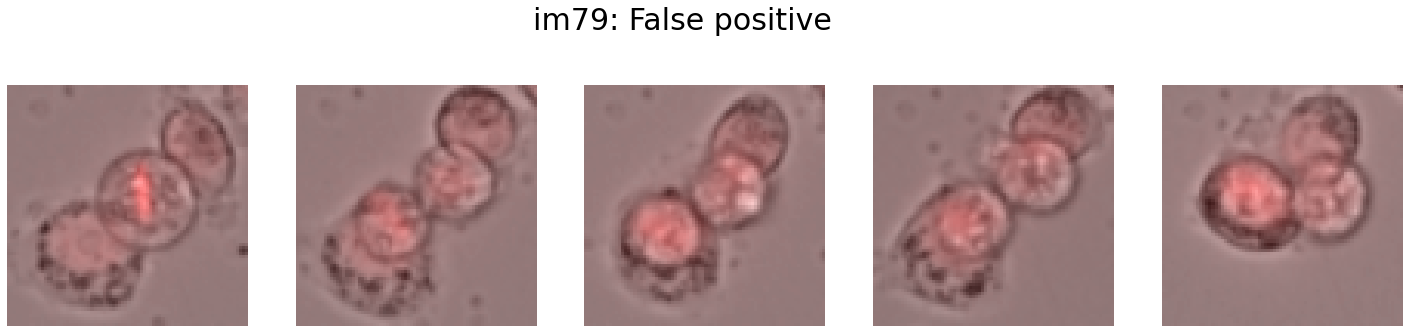

In [56]:
#/content/VGG16-best_weights_patience100-lr1e-05-bs20-from_scratch/best_weights-lr1e-05-bs20-scratch-iter0.tf

#/content/drive/MyDrive/Pablo Delgado/Nantes-Madrid/Publications/Mitosis classifier/Publications code/Epochs-500, patience-100/ResNet50-best_weights_patience100-lr0.0001-bs10-pretrained/best_weights-step2/best_weights-lr1e-05-bs10-pretr-iter1.tf

import operator
#@markdown Path to the folder where your test data are stored (with images inside two folders: AbnormalMitosis and NormalMitosis)
testImPath = "/content/drive/MyDrive/Pablo Delgado/Nantes-Madrid/ALL DATA/Mitosis classification/Final_images/mitosis_12_test" #@param {type:"string"}

#@markdown Specific path with the model you want to test 
modelFolder = '/content/drive/MyDrive/Pablo Delgado/Nantes-Madrid/Publications/Mitosis classifier/Publications code/Epochs-500, patience-100/ResNet50-best_weights_patience100-lr0.001-bs10-pretrained' #@param {type:"string"}


#@markdown Folder to store your results
resultsFolder = '' #@param {type:"string"}


#The format of the weights to be loaded (.hdf5 or .tf)
#format = '.hdf5'
#format = '.tf'

if len(resultsFolder)==0:
  save = False
else:
  save = True

#---------------------------------------------------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------

#Adding the step2 folder if the model was trained in two steps
if any('/best_weights-step2' in name for name in glob(modelFolder+'/*')):
  twoSteps = True
  modelFolder = modelFolder + '/best_weights-step2'
else:
  twoSteps=False

#Constants

numIters = 1

step = 2

#Extract model name and hyperparameters from the model's path
if twoSteps == False:
  nameInParts = os.path.basename(modelFolder).split('-')

elif twoSteps == True:
  nameInParts = os.path.basename(os.path.split(modelFolder)[0]).split('-')
  
modelName = nameInParts[0]
print('modelName:', modelName)
patience = int(nameInParts[1].split('patience')[1])
print('patience: ',patience)
lr = float(modelFolder.split('-lr')[1].split('-bs')[0])
print('lr: ',lr)
bs = int(modelFolder.split('-bs')[1].split('-')[0])
print('bs: ',bs)
pretrained = ('from_scratch' != nameInParts[-1])
print('pretrained: ',pretrained)

#iterName = str(iter)

#Install and import libraries

!pip install keras-video-generators
!pip install -U keras-tuner
!pip install elasticdeform
!pip install keras --upgrade
!git clone --branch patch-1  https://github.com/pdelgado248/keras-video-generators.git

#To solve an error loading "from tensorflow.compat.v2.experimental import dtensor as dtensor_api" 
!pip install keras==2.6.*

# Define global params

CLASSES = 2                 # Number of classes
SIZE = (78, 78)             # Image input size
CHANNELS = 3                # Number of channels: 3 RGB, 1 Grayscale
NBFRAME = 12                # Number of video frames  
SHAPE = SIZE + (CHANNELS,)  # Shape = size + channel (78, 78, 3)
INSHAPE = (NBFRAME,) + SHAPE  # Video-shape = frame + shape (12, 78, 78, 3)





#MODEL DEFINITION

#*************************************************************************************************************************************
#-------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------
#Models


#VGG16
if modelName == 'VGG16':

  from tensorflow.keras.layers import Flatten, TimeDistributed, GRU, Dense, Dropout, LSTM

  def build_convnet(step):

      model = tf.keras.applications.VGG16(
      include_top=False,
      input_shape=SHAPE
      )

      output = Flatten()

      return tf.keras.models.Sequential([model, output])


  def action_model(shape=(12, 78, 78, 3), nbout=2,step=step):
      # Here we call our conv network
      convnet = build_convnet(step)
      
      # Final model
      model = keras.Sequential()
      # Call convnet into the TimeDistributed layer with video shape
      model.add(TimeDistributed(convnet, input_shape=shape))
      # LSTM for temporal features extraction
      model.add(LSTM(64))
      # Classification part
      model.add(Dropout(.4))
      model.add(Dense(150, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
      model.add(Dropout(.2))
      model.add(Dense(nbout, activation='softmax'))

      return model

#-------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------

elif modelName == 'Xception':

  from tensorflow.keras.layers import Flatten, GlobalMaxPooling2D,TimeDistributed, GRU, Dense, Dropout, LSTM
  def build_convnet(step):
      
      model = tf.keras.applications.Xception(
          include_top=False,
          input_shape=SHAPE  
      )

      output = Flatten()

      return tf.keras.models.Sequential([model, output])

  def action_model(shape=(12, 78, 78, 3), nbout=2,step=step):
      # Here we call our conv network
      convnet = build_convnet(step)
      
      # Final model
      model = keras.Sequential()
      # Call convnet into the TimeDistributed layer with video shape
      model.add(TimeDistributed(convnet, input_shape=shape))
      # LSTM for temporal features extraction
      model.add(LSTM(64))
      # Classification part
      model.add(Dropout(.4))
      model.add(Dense(150, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
      model.add(Dropout(.2))
      model.add(Dense(nbout, activation='softmax'))

      return model

#-------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------

elif modelName == 'ResNet50':

  from tensorflow.keras.layers import Flatten, GlobalMaxPooling2D,TimeDistributed, GRU, Dense, Dropout, LSTM

  def build_convnet(step):
      model = tf.keras.applications.ResNet50(
          include_top=False,
          input_shape=SHAPE
      )

      output = Flatten()

      return tf.keras.models.Sequential([model, output])


  def action_model(shape=(12, 78, 78, 3), nbout=2,step=step):
      # Here we call our conv network
      convnet = build_convnet(step)
      
      # Final model
      model = keras.Sequential()
      # Call convnet into the TimeDistributed layer with video shape
      model.add(TimeDistributed(convnet, input_shape = shape))
      # LSTM for temporal features extraction
      model.add(LSTM(64))
      # Classification part
      model.add(Dropout(.4))
      model.add(Dense(150, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
      model.add(Dropout(.2))
      model.add(Dense(nbout, activation='softmax'))

      return model

#-------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------

elif modelName == 'Gao':

  from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D, AveragePooling2D, Flatten,TimeDistributed, GRU, Dense, Dropout, LSTM

  def build_convnet(step):
      momentum = .9 # Batch normalization momemtum (optional)
      model = keras.Sequential() # Starts model
      # Input layer
      model.add(Conv2D(6, (7,7), input_shape=SHAPE, padding='valid', activation='relu'))
      model.add(BatchNormalization(momentum=momentum))
      
      model.add(MaxPooling2D(2,2))
      
      model.add(Conv2D(16, (4,4), padding='valid', activation='relu'))
      model.add(BatchNormalization(momentum=momentum))
      
      model.add(MaxPooling2D(3,3))

      model.add(Conv2D(32, (3,3), padding='valid', activation='relu'))
      model.add(BatchNormalization(momentum=momentum))
      
      model.add(MaxPooling2D(3,3))
      
      # Flatten layer for LSTM input
      model.add(Flatten()) 

      return model



  def action_model(shape=(12, 78, 78, 3), nbout=2,step=step):
      # Here we call our conv network
      convnet = build_convnet(step)
      
      # Final model
      model = keras.Sequential()
      # Call convnet into the TimeDistributed layer with video shape
      model.add(TimeDistributed(convnet, input_shape=shape))
      # LSTM for temporal features extraction
      model.add(LSTM(64))
      # Classification part
      model.add(Dropout(.4))
      model.add(Dense(150, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
      model.add(Dropout(.2))
      model.add(Dense(nbout, activation='softmax'))

      return model


#-------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------
#*************************************************************************************************************************************



# Call model
model = action_model(INSHAPE, CLASSES)

# Define the optimizer
optimizer = keras.optimizers.Adam(lr)

# Compile the model
model.compile(optimizer,'categorical_crossentropy',metrics=['acc'])

model.summary()

#----------------------------------------------------------------------------------------------------------------------------------------
#Potential loop from here to the end

for i in range(numIters):


  iterName = str(i)


  #Load the weights

  #Weights path for the specific iteration "iterName".This format for each iteration: modelFolder/*'+iterName+'.tf')
  if len(glob(modelFolder+'/*'+iterName+'.hdf5'))!=0:
    weightsPath = glob(modelFolder+'/*'+iterName+'.hdf5')[0]
  
  else:
    weightsPath = glob(modelFolder+'/*'+iterName+'.tf*')[0]
    weightsPath = weightsPath.split('.tf')[0] + '.tf'


  model.load_weights(weightsPath)


  #Extract the global pattern to load the images
  glob_pattern= testImPath + '/{classname}/*'

  test = VideoFrameGenerator(
      rescale=1/255.,             # Normalization scale
      glob_pattern = glob_pattern,  # Directory path
      nb_frames = NBFRAME,          # Number of frames
      split_val = None,             # Split validation set
      split_test = None,            # Split test set
      shuffle = False,               # Randomize file
      batch_size = 1,               # Batch size
      target_shape=SIZE,          # Input size
      nb_channel=CHANNELS,        # Number of channels
      transformation=None,        # Data augmentation
      use_frame_cache=True        # Use frame chache to store images
  )




  #----------------------------------------------------------------
  #Validation and training measures and graphs

  # Evaluate the model on the test data using `evaluate`
  print("Evaluate on test data")
  results = model.evaluate(test, verbose=1, return_dict=True)

  f1Scores = np.zeros([1,numIters])

  def showMitosis(video,Title,Dpi = 200, figSize = [25,14] ):
    #Plots frames 0, 3, 6, 9 and 11 of a mitosis
    f = plt.figure(figsize = figSize)
    plt.suptitle(Title,fontsize = 30,y=0.7)

    ax1 = f.add_subplot(151)
    ax1.imshow(video[0,0,:,:,:])
    ax1.axis('off')

    ax2 = f.add_subplot(152)
    ax2.imshow(video[0,3,:,:,:])
    ax2.axis('off')

    ax3 = f.add_subplot(153)
    ax3.imshow(video[0,6,:,:,:])
    ax3.axis('off')

    ax4 = f.add_subplot(154)
    ax4.imshow(video[0,9,:,:,:])
    ax4.axis('off')

    ax5 = f.add_subplot(155)
    ax5.imshow(video[0,11,:,:,:])
    ax5.axis('off')

  def calculateMeasures(dataload):
    
    #Calculates accuracy, precision, recall and f1 on the dataload data, returns
    #a numpy array ([acc, pre, rec, f1])


    numFiles=len(dataload.files)

    fp = 0
    tn = 0
    tp = 0
    fn = 0
    index = [];
    print('Number of test images: ', numFiles)
    for i in range(numFiles):	
      video = dataload[i][0]
      groundTruth = dataload[i][1]

      prediction = model.predict(video)

      #print('im',i,': ',groundTruth[0],prediction[0])
      
      if(groundTruth[0][0] != 0 and prediction[0][0] < 0.5):
        #print(prediction[0], "  real : ", groundTruth[0], " index ", i)
        #plt.figure()
        #plt.imshow()
        #print(video.shape)
        index = index + [i];
        fn = fn + 1
        showMitosis(video,Title = 'im{}: False negative'.format(i))


      elif (groundTruth[0][0] != 0 and prediction[0][0] > 0.5):
        tp = tp + 1
        #showMitosis(video,Title = 'im{}: True positive'.format(i))
      elif (groundTruth[0][0] != 1 and prediction[0][0] > 0.5):
        #print(prediction[0], "  real : ", groundTruth[0], " index ", i)
        index = index + [i]
        fp = fp + 1
        showMitosis(video,Title = 'im{}: False positive'.format(i))


      elif (groundTruth[0][0] != 1 and prediction[0][0] < 0.5):
        tn = tn + 1
        #showMitosis(video,Title = 'im{}: True negative'.format(i))
    

    #Obtain accuracy (acc), precision (pre), recall (rec), f1 on test data
    acc = (tp+tn)/numFiles

    print('acc : ', acc)
    
    if (tp+fp)!=0:
      prec = tp/(tp+fp)
      print('prec : ', prec)

    else:
      prec = 0
      print('prec : NaN (tp + fp = 0)')

    if (tp+fn)!=0:  
      rec = tp/(tp+fn)
      print('rec : ', rec)
    else:
      rec = 0
      print('rec : NaN (tp + fn = 0)')

    
    if (2*tp+fp+fn)!=0:
      f1 = 2*tp/(2*tp+fp+fn)
      print('f1 : ', 2*tp/(2*tp+fp+fn))
    else:
      f1 = 0
      print('f1 : NaN (2*tp+fp+fn = 0)')

    scores = str(acc)+','+str(prec)+','+str(rec)+','+str(f1)

    print('tp: ',tp,'\ntn: ',tn,'\nfp: ',fp,'\nfn: ',fn)
    return scores, f1 

  

  print('\n\nFinal model test scores:')
  testScores, f1 = calculateMeasures(test)
  f1Scores[0,i] = f1


  if '/' in modelFolder:
    modelFolderAux = modelFolder.split('/')[0]
  else:
    modelFolderAux = modelFolder

  #Check whether the results txt file exists. If it doesn't, create it.
  headers = ['iter,test_acc,test_prec,test_rec,test_f1']

  if save is True:
    if not os.path.exists(resultsFolder+'/'+ modelFolderAux + '.txt'):
      np.savetxt(resultsFolder+'/'+ modelFolderAux + '.txt',headers,delimiter=',',fmt="%s")


   #Append a line of results to the results file
    with open(resultsFolder+'/'+ modelFolderAux + '.txt', 'a') as file_object:
      file_object.write(str(i)+','+ testScores)  
      file_object.write('\n')


# **6. Inference**
---

<font size = 4>This section lets you run a pretrained model on new data. Specify the path to your data folder and to the weights you want to use for the model. The results will be displayed after running the net.

##**Apply a previously trained network to new data**

In [33]:
#/content/VGG16-best_weights_patience100-lr1e-05-bs20-from_scratch/best_weights-lr1e-05-bs20-scratch-iter0.tf

#/content/drive/MyDrive/Pablo Delgado/Nantes-Madrid/Publications/Mitosis classifier/Publications code/Epochs-500, patience-100/ResNet50-best_weights_patience100-lr0.0001-bs10-pretrained/best_weights-step2/best_weights-lr1e-05-bs10-pretr-iter1.tf

import operator
#@markdown Path to the folder where your new data are stored
newImsPath = "/content/drive/MyDrive/Pablo Delgado/Nantes-Madrid/ALL DATA/Mitosis classification/Final_images/mitosis_12_test" #@param {type:"string"}

#@markdown Main path to the models folder
mainFolderfullPath = '/content/drive/MyDrive/Pablo Delgado/Nantes-Madrid/Publications/Mitosis classifier/Publications code/Epochs-500, patience-100' #@param {type:"string"}
#@markdown Specific path with the model you want to test (include "/best_weights-step2" at the end if you ar testing a 2-step model)
modelFolder = '/content/drive/MyDrive/Pablo Delgado/Nantes-Madrid/Publications/Mitosis classifier/Publications code/Epochs-500, patience-100/ResNet50-best_weights_patience100-lr0.001-bs10-pretrained' #@param {type:"string"}


#@markdown Folder to store your results
resultsFolder = '/content/drive/MyDrive/Pablo Delgado/Nantes-Madrid/Publications/Mitosis classifier' #@param {type:"string"}


#The format of the weights to be loaded (.hdf5 or .tf)
#format = '.hdf5'
#format = '.tf'



#Iteration you want to use of the trained model
iterName = 0

#---------------------------------------------------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------
#Adding the step2 folder if the model was trained in two steps
if any('/best_weights-step2' in name for name in glob(modelFolder+'/*')):
  twoSteps = True
  modelFolder = modelFolder + '/best_weights-step2'
else:
  twoSteps=False

from glob import glob as glob

iterName = str(iterName)

if len(resultsFolder)==0:
  save = False
else:
  save = True

#Constants

step = 2

#Extract model name and hyperparameters from the model's path
nameInParts = modelFolder.split('-')
modelName = nameInParts[0]
print('modelName:', modelName)
patience = int(nameInParts[1].split('patience')[1])
print('patience: ',patience)
lr = float(modelFolder.split('-lr')[1].split('-bs')[0])
print('lr: ',lr)
bs = int(modelFolder.split('-bs')[1].split('-')[0])
print('bs: ',bs)
pretrained = ('from_scratch' != nameInParts[-1])
print('pretrained: ',pretrained)

#iterName = str(iter)

#Install and import libraries

#To solve an error loading "from tensorflow.compat.v2.experimental import dtensor as dtensor_api" 
!pip install keras==2.6.*

# Define global params

CLASSES = 2                 # Number of classes
SIZE = (78, 78)             # Image input size
CHANNELS = 3                # Number of channels: 3 RGB, 1 Grayscale
NBFRAME = 12                # Number of video frames  
SHAPE = SIZE + (CHANNELS,)  # Shape = size + channel (78, 78, 3)
INSHAPE = (NBFRAME,) + SHAPE  # Video-shape = frame + shape (12, 78, 78, 3)


#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#Define the specific names of the images
newImsPaths = glob(newImsPath+'/*.tif')
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


#MODEL DEFINITION

#*************************************************************************************************************************************
#-------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------
#Models


#VGG16
if modelName == 'VGG16':

  def build_convnet(step):

      model = tf.keras.applications.VGG16(
      include_top=False,
      input_shape=SHAPE
      )

      output = Flatten()

      return tf.keras.models.Sequential([model, output])


  def action_model(shape=(12, 78, 78, 3), nbout=2,step=step):
      # Here we call our conv network
      convnet = build_convnet(step)
      
      # Final model
      model = keras.Sequential()
      # Call convnet into the TimeDistributed layer with video shape
      model.add(TimeDistributed(convnet, input_shape=shape))
      # LSTM for temporal features extraction
      model.add(LSTM(64))
      # Classification part
      model.add(Dropout(.4))
      model.add(Dense(150, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
      model.add(Dropout(.2))
      model.add(Dense(nbout, activation='softmax'))

      return model

#-------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------

elif modelName == 'Xception':


  def build_convnet(step):
      
      model = tf.keras.applications.Xception(
          include_top=False,
          input_shape=SHAPE  
      )

      output = Flatten()

      return tf.keras.models.Sequential([model, output])

  def action_model(shape=(12, 78, 78, 3), nbout=2,step=step):
      # Here we call our conv network
      convnet = build_convnet(step)
      
      # Final model
      model = keras.Sequential()
      # Call convnet into the TimeDistributed layer with video shape
      model.add(TimeDistributed(convnet, input_shape=shape))
      # LSTM for temporal features extraction
      model.add(LSTM(64))
      # Classification part
      model.add(Dropout(.4))
      model.add(Dense(150, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
      model.add(Dropout(.2))
      model.add(Dense(nbout, activation='softmax'))

      return model

#-------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------

elif modelName == 'ResNet50':


  def build_convnet(step):
      model = tf.keras.applications.ResNet50(
          include_top=False,
          input_shape=SHAPE
      )

      output = Flatten()

      return tf.keras.models.Sequential([model, output])


  def action_model(shape=(12, 78, 78, 3), nbout=2,step=step):
      # Here we call our conv network
      convnet = build_convnet(step)
      
      # Final model
      model = keras.Sequential()
      # Call convnet into the TimeDistributed layer with video shape
      model.add(TimeDistributed(convnet, input_shape = shape))
      # LSTM for temporal features extraction
      model.add(LSTM(64))
      # Classification part
      model.add(Dropout(.4))
      model.add(Dense(150, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
      model.add(Dropout(.2))
      model.add(Dense(nbout, activation='softmax'))

      return model

#-------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------

elif modelName == 'Gao':

  def build_convnet(step):
      momentum = .9 # Batch normalization momemtum (optional)
      model = keras.Sequential() # Starts model
      # Input layer
      model.add(Conv2D(6, (7,7), input_shape=SHAPE, padding='valid', activation='relu'))
      model.add(BatchNormalization(momentum=momentum))
      
      model.add(MaxPooling2D(2,2))
      
      model.add(Conv2D(16, (4,4), padding='valid', activation='relu'))
      model.add(BatchNormalization(momentum=momentum))
      
      model.add(MaxPooling2D(3,3))

      model.add(Conv2D(32, (3,3), padding='valid', activation='relu'))
      model.add(BatchNormalization(momentum=momentum))
      
      model.add(MaxPooling2D(3,3))
      
      # Flatten layer for LSTM input
      model.add(Flatten()) 

      return model



  def action_model(shape=(12, 78, 78, 3), nbout=2,step=step):
      # Here we call our conv network
      convnet = build_convnet(step)
      
      # Final model
      model = keras.Sequential()
      # Call convnet into the TimeDistributed layer with video shape
      model.add(TimeDistributed(convnet, input_shape=shape))
      # LSTM for temporal features extraction
      model.add(LSTM(64))
      # Classification part
      model.add(Dropout(.4))
      model.add(Dense(150, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
      model.add(Dropout(.2))
      model.add(Dense(nbout, activation='softmax'))

      return model


#-------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------
#*************************************************************************************************************************************

# Call model
model = action_model(INSHAPE, CLASSES)

# Define the optimizer
optimizer = keras.optimizers.Adam(lr)

# Compile the model
model.compile(optimizer,'categorical_crossentropy',metrics=['acc'])

model.summary()

#----------------------------------------------------------------------------------------------------------------------------------------
#Potential loop from here to the end





#Load the weights

#Weights path for the specific iteration "iterName".This format for each iteration: modelFolder/*'+iterName+'.tf')
if len(glob(modelFolder+'/*'+iterName+'.hdf5'))!=0:
  weightsPath = glob(modelFolder+'/*'+iterName+'.hdf5')[0]

else:
  weightsPath = glob(modelFolder+'/*'+iterName+'.tf*')[0]
  weightsPath = weightsPath.split('.tf')[0] + '.tf'


model.load_weights(weightsPath)


def showMitosis(video,Title,Dpi = 200, figSize = [25,14] ):
  #Plots frames 0, 3, 6, 9 and 11 of a mitosis
  f = plt.figure(figsize = figSize)
  plt.suptitle(Title,fontsize = 30,y=0.7)

  ax1 = f.add_subplot(151)
  ax1.imshow(video[0,0,:,:,:])
  ax1.axis('off')

  ax2 = f.add_subplot(152)
  ax2.imshow(video[0,3,:,:,:])
  ax2.axis('off')

  ax3 = f.add_subplot(153)
  ax3.imshow(video[0,6,:,:,:])
  ax3.axis('off')

  ax4 = f.add_subplot(154)
  ax4.imshow(video[0,9,:,:,:])
  ax4.axis('off')

  ax5 = f.add_subplot(155)
  ax5.imshow(video[0,11,:,:,:])
  ax5.axis('off')

def calculateMeasures(dataload):
  
  #Calculates accuracy, precision, recall and f1 on the dataload data, returns
  #a numpy array ([acc, pre, rec, f1])


  numFiles=len(dataload.files)

  fp = 0
  tn = 0
  tp = 0
  fn = 0
  index = [];
  print('Number of test images: ', numFiles)
  for i in range(numFiles):	
    video = dataload[i][0]
    groundTruth = dataload[i][1]

    prediction = model.predict(video)

    print('im',i,': ',groundTruth[0],prediction[0])
    
    if(groundTruth[0][0] != 0 and prediction[0][0] < 0.5):
      #print(prediction[0], "  real : ", groundTruth[0], " index ", i)
      #plt.figure()
      #plt.imshow()
      #print(video.shape)
      index = index + [i];
      fn = fn + 1
      showMitosis(video,Title = '\n\n\n\n\n\n\n\nim{}: False negative'.format(i))


    elif (groundTruth[0][0] != 0 and prediction[0][0] > 0.5):
      tp = tp + 1
      showMitosis(video,Title = '\n\n\n\n\n\n\n\nim{}: True positive'.format(i))
    elif (groundTruth[0][0] != 1 and prediction[0][0] > 0.5):
      #print(prediction[0], "  real : ", groundTruth[0], " index ", i)
      index = index + [i]
      fp = fp + 1
      showMitosis(video,Title = '\n\n\n\n\n\n\n\nim{}: False positive'.format(i))


    elif (groundTruth[0][0] != 1 and prediction[0][0] < 0.5):
      tn = tn + 1
      showMitosis(video,Title = '\n\n\n\n\n\n\n\nim{}: True negative'.format(i))
  

  #Obtain accuracy (acc), precision (pre), recall (rec), f1 on test data
  acc = (tp+tn)/numFiles

  print('acc : ', acc)
  
  if (tp+fp)!=0:
    prec = tp/(tp+fp)
    print('prec : ', prec)

  else:
    prec = 0
    print('prec : NaN (tp + fp = 0)')

  if (tp+fn)!=0:  
    rec = tp/(tp+fn)
    print('rec : ', rec)
  else:
    rec = 0
    print('rec : NaN (tp + fn = 0)')

  
  if (2*tp+fp+fn)!=0:
    f1 = 2*tp/(2*tp+fp+fn)
    print('f1 : ', 2*tp/(2*tp+fp+fn))
  else:
    f1 = 0
    print('f1 : NaN (2*tp+fp+fn = 0)')

  scores = str(acc)+','+str(prec)+','+str(rec)+','+str(f1)

  print('tp: ',tp,'\ntn: ',tn,'\nfp: ',fp,'\nfn: ',fn)
  return scores, f1 

for normalIm in newImsPaths:

  #Use the dataloader to load a single image
  infer = VideoFrameGenerator(
    rescale=1/255.,             # Normalization scale
    glob_pattern = normalIm,  # Directory path
    nb_frames = NBFRAME,          # Number of frames
    split_val = None,             # Split validation set
    split_test = None,            # Split test set
    shuffle = False,               # Randomize file
    batch_size = 1,               # Batch size
    target_shape=SIZE,          # Input size
    nb_channel=CHANNELS,        # Number of channels
    transformation=None,        # Data augmentation
    use_frame_cache=True        # Use frame chache to store images
  )

  video = infer[0][0]

  prediction=model.predict(video)[0]

  if prediction[0]>=0.5:
    predClass = 'Abnormal'
  else:
    predClass = 'Normal'

  title = '\n{} - prediction: {}'.format(os.path.basename(normalIm),predClass)
  showMitosis(video,title)

  if save is True:
    headers = ['image,prediction']
    if not os.path.exists(resultsFolder+'/predictions'+'.txt'):
      np.savetxt(resultsFolder+'/predictions'+'.txt',headers,delimiter=',',fmt="%s")


    #Append a line of results to the results file
    with open(resultsFolder+'/predictions'+'.txt', 'a') as file_object:
      file_object.write(os.path.basename(normalIm)+','+ predClass)  
      file_object.write('\n')





Output hidden; open in https://colab.research.google.com to view.